Problem Statement: **Data Wrangling II**

Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [1]:
import numpy as np
import pandas as pd

In [13]:
data = {
    'Student ID' : range(1,21),
    'Age':[16,19,24,19,17,18,16,16,np.nan,26,np.nan,20,19,17,20,np.nan,16,18,18,19],
    'Gender':['Male','Female','Female','Male','Female','Male','Male','Female','Female','Female','Male',
              'Female','Male','Female','Female','Male','Female','Female','Male','Male'],
    'English':[40,56,np.nan,98,44,46,52,90,20,np.nan,65,34,42,25,45,69,98,99,10,20],
    'Maths': [np.nan,56,34,98,44,46,np.nan,90,20,22,65,34,42,25,45,np.nan,98,99,10,20],
    'Science':[40,56,34,98,44,46,52,90,20,22,65,34,np.nan,25,45,69,98,99,10,20]
}

In [26]:
df = pd.DataFrame(data)
df.head()

,Student ID,Age,Gender,English,Maths,Science
0,1,16.0,Male,40.0,NaN,40.0
1,2,19.0,Female,56.0,56.0,56.0
2,3,24.0,Female,NaN,34.0,34.0
3,4,19.0,Male,98.0,98.0,98.0
4,5,17.0,Female,44.0,44.0,44.0


In [27]:
print(df.isnull().sum())

Student ID    0
Age           3
Gender        0
English       2
Maths         3
Science       1
dtype: int64


In [28]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['English'] = df['English'].fillna(df['English'].mean())
df['Maths'] = df['Maths'].fillna(df['Maths'].mean())
df['Science'] = df['Science'].fillna(df['Science'].mean())
df

,Student ID,Age,Gender,English,Maths,Science
0,1,16.0,Male,40.000000,49.882353,40.000000
1,2,19.0,Female,56.000000,56.000000,56.000000
2,3,24.0,Female,52.944444,34.000000,34.000000
3,4,19.0,Male,98.000000,98.000000,98.000000
4,5,17.0,Female,44.000000,44.000000,44.000000
5,6,18.0,Male,46.000000,46.000000,46.000000
6,7,16.0,Male,52.000000,49.882353,52.000000
7,8,16.0,Female,90.000000,90.000000,90.000000
8,9,18.0,Female,20.000000,20.000000,20.000000
9,10,26.0,Female,52.944444,22.000000,22.000000


In [29]:
df.describe()

,Student ID,Age,English,Maths,Science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,18.600000,52.944444,49.882353,50.894737
std,5.91608,2.542274,26.755171,27.464585,27.832005
min,1.00000,16.000000,10.000000,10.000000,10.000000
25%,5.75000,17.000000,38.500000,31.750000,31.750000
50%,10.50000,18.000000,49.000000,45.500000,45.500000
75%,15.25000,19.000000,66.000000,58.250000,66.000000
max,20.00000,26.000000,99.000000,99.000000,99.000000


Detecting Outliers:


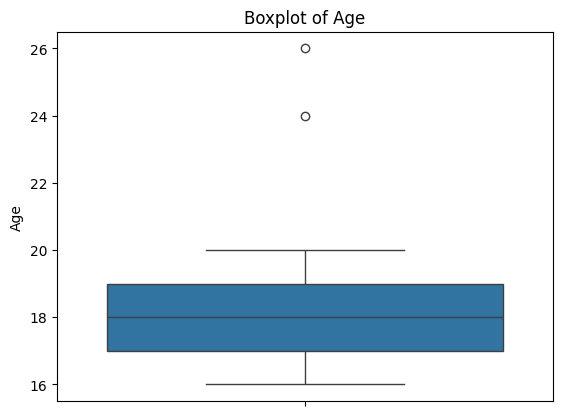

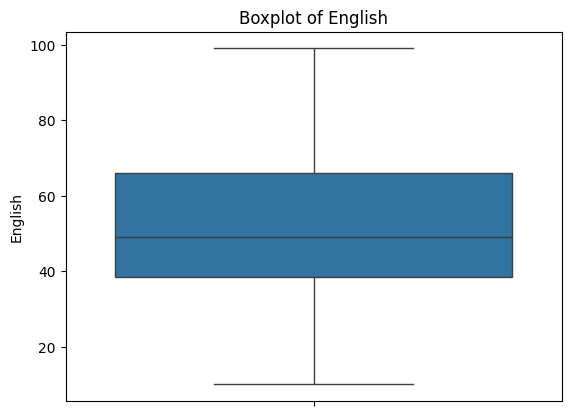

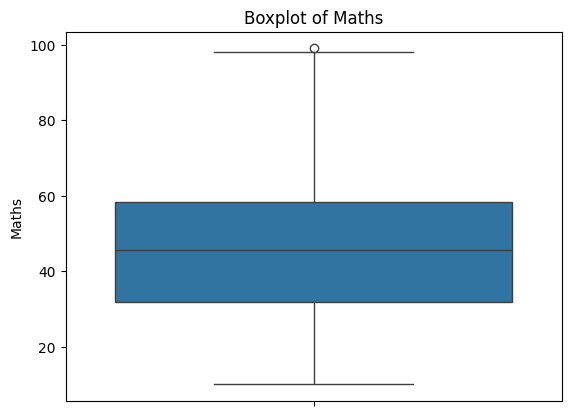

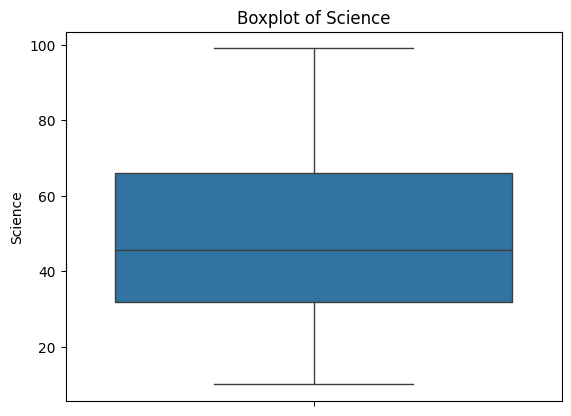

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Detecting Outliers:")
for column in ['Age', 'English', 'Maths', 'Science']:
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

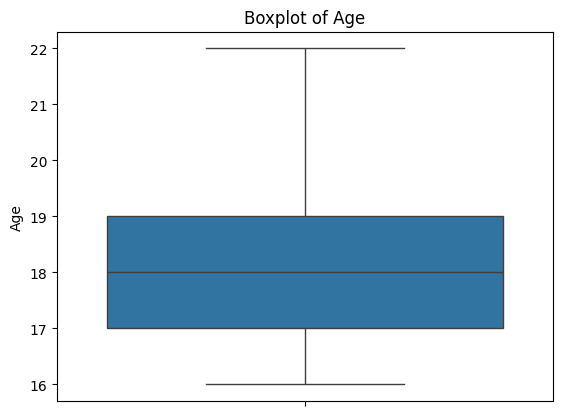

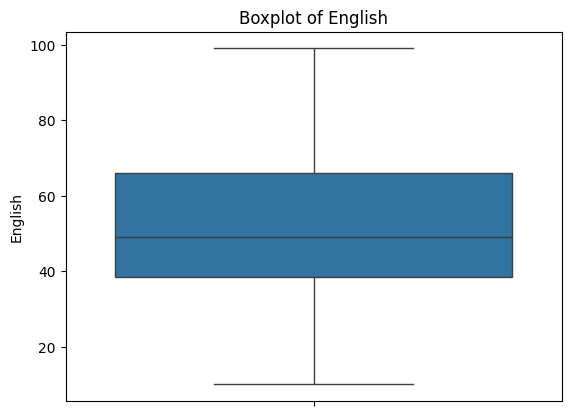

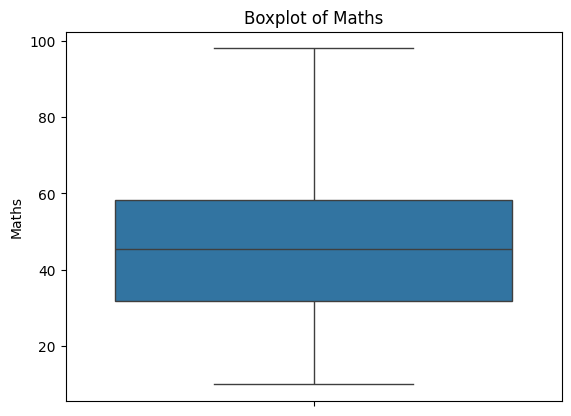

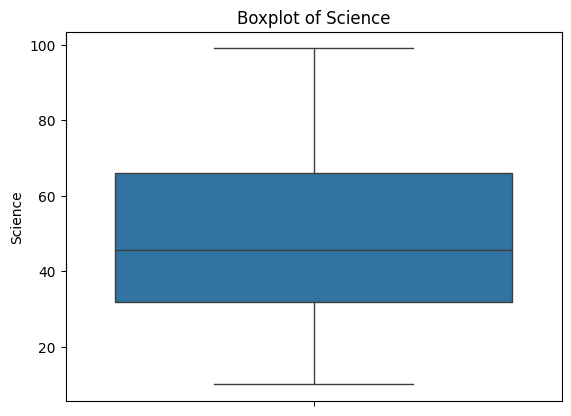

In [32]:
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for column in ['Age', 'English', 'Maths', 'Science']:
    handle_outliers(column)
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Before Transformation
<bound method NDFrame.describe of 0     40.000000
1     56.000000
2     52.944444
3     98.000000
4     44.000000
5     46.000000
6     52.000000
7     90.000000
8     20.000000
9     52.944444
10    65.000000
11    34.000000
12    42.000000
13    25.000000
14    45.000000
15    69.000000
16    98.000000
17    99.000000
18    10.000000
19    20.000000
Name: English, dtype: float64>


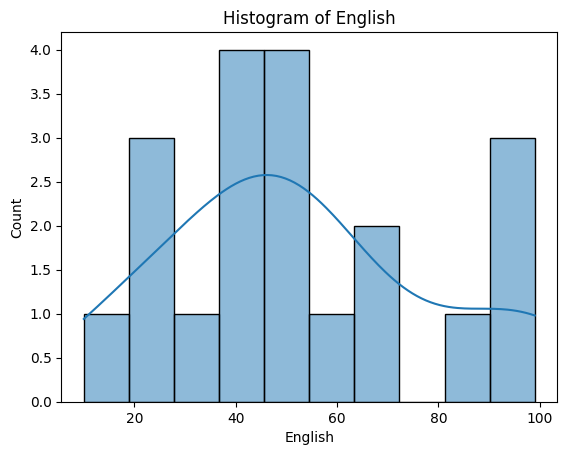

After Transformation
<bound method NDFrame.describe of 0     3.713572
1     4.043051
2     3.987955
3     4.595120
4     3.806662
5     3.850148
6     3.970292
7     4.510860
8     3.044522
9     3.987955
10    4.189655
11    3.555348
12    3.761200
13    3.258097
14    3.828641
15    4.248495
16    4.595120
17    4.605170
18    2.397895
19    3.044522
Name: English, dtype: float64>


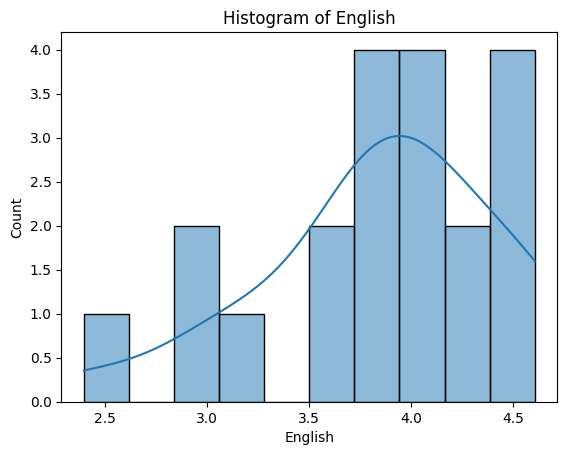

In [33]:
print('Before Transformation')
print(df['English'].describe)
sns.histplot(df['English'], kde=True, bins=10)
plt.title('Histogram of English')
plt.show()

df['English'] = np.log1p(df['English'])

print('After Transformation')
print(df['English'].describe)
sns.histplot(df['English'], kde=True, bins=10)
plt.title('Histogram of English')
plt.show()